# Spline

In [84]:
%pip install --upgrade numpy pandas

Note: you may need to restart the kernel to use updated packages.


In [85]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/spline


  Cloning https://github.com/ParkhomenkoDV/spline to c:\users\parkh\appdata\local\temp\pip-req-build-7yu3_vsy
  Resolved https://github.com/ParkhomenkoDV/spline to commit 7ea3e9dd484449540d1f4999f319a610c2124623
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for spline: filename=spline-2024.10.27.16.3-py3-none-any.whl size=129382 sha256=c0ee171e37ee84b0c8cc6c933e29192c424a63c6aee7af67f6438492c8a1d13b
  Stored in directory: C:\Users\parkh\AppData\Local\Temp\pip-ephem-wheel-cache-elnfvaqd\wheels\ce\65\25\81b16e25a1280154a88d8883d804181cbf40a0e1a3dd51cf21
Successfully built spline
  Attempting uninstall: spline
    Found existing installation: spline 2024.10.27.12.9
    Uninstalling spline-2024.10.27.12.9:
      Successfully uninstalled spline-2024.10.27.12.9


  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/spline 'C:\Users\parkh\AppData\Local\Temp\pip-req-build-7yu3_vsy'


# libraries

In [86]:
import pandas as pd
import numpy as np

from spline import REFERENCES, STANDARDS, VOCABULARY, JOIN, Spline

In [87]:
for _, reference in REFERENCES.items(): print(reference)

Детали машин: учебник для вузов / 
[Л.А. Андриенко, Д38 Б.А. Байков, М.Н. Захаров и др.]; под ред. О.А. Ряховского. -
4-е изд., перераб. и доп. - 
Москва: Издательство МГТУ им. Н.Э. Баумана, 2014. - 465, [7] с.: ил


In [88]:
VOCABULARY

mappingproxy({'standard': {'description': 'cтандарт',
               'unit': '',
               'type': (int, numpy.integer),
               'assert': (<function spline.spline.<lambda>(standard)>,)},
              'join': {'description': 'вид центрирования',
               'unit': '',
               'type': (str,),
               'assert': (<function spline.spline.<lambda>(join)>,)},
              'n_teeth': {'description': 'количество зубьев',
               'unit': '',
               'type': (int, numpy.integer),
               'assert': (<function spline.spline.<lambda>(n_teeth)>,)},
              'module': {'description': 'модуль зубьев',
               'unit': 'm',
               'type': (float, numpy.floating),
               'assert': (<function spline.spline.<lambda>(module)>,)},
              'd': {'description': 'номинальный диаметр вала',
               'unit': 'm',
               'type': (int, float, numpy.number),
               'assert': (<function spline.spline.<lambda>(

# init spline

In [89]:
print(JOIN)

{'inner': 'по внутреннему диаметру', 'left': 'по боковым граням', 'right': 'по боковым граням', 'outer': 'по наружному диаметру'}


In [90]:
STANDARDS.keys()

dict_keys(['1139', '6033', '100092'])

## 1139

In [91]:
STANDARDS['1139']['description']

'прямобочные шлицевые соединения'

In [92]:
with pd.option_context("display.max_rows", 100, "display.max_columns", 20):
    display(STANDARDS['1139']['standard'])

,n_teeth,d,D,width,corner_diameter,corner_width,chamfer,chamfer_deviation,radius
0,6,0.023,0.026,0.0060,0.0221,0.00354,0.0003,0.0002,0.0002
1,6,0.026,0.030,0.0060,0.0246,0.00385,0.0003,0.0002,0.0002
2,6,0.028,0.032,0.0070,0.0267,0.00403,0.0003,0.0002,0.0002
3,8,0.032,0.036,0.0060,0.0304,0.00271,0.0004,0.0002,0.0003
4,8,0.036,0.040,0.0070,0.0345,0.00346,0.0004,0.0002,0.0003
5,8,0.042,0.046,0.0080,0.0404,0.00503,0.0004,0.0002,0.0003
6,8,0.046,0.050,0.0090,0.0446,0.00575,0.0004,0.0002,0.0003
7,8,0.052,0.058,0.0100,0.0497,0.00489,0.0005,0.0003,0.0005
8,8,0.056,0.062,0.0100,0.0536,0.00638,0.0005,0.0003,0.0005
9,8,0.062,0.068,0.0120,0.0598,0.00731,0.0005,0.0003,0.0005


In [93]:
spline1139 = Spline('1139', 'left', n_teeth=8, d=0.046,	D=0.054)

In [94]:
spline1139.resistance_moment

4.806911386789083e-06

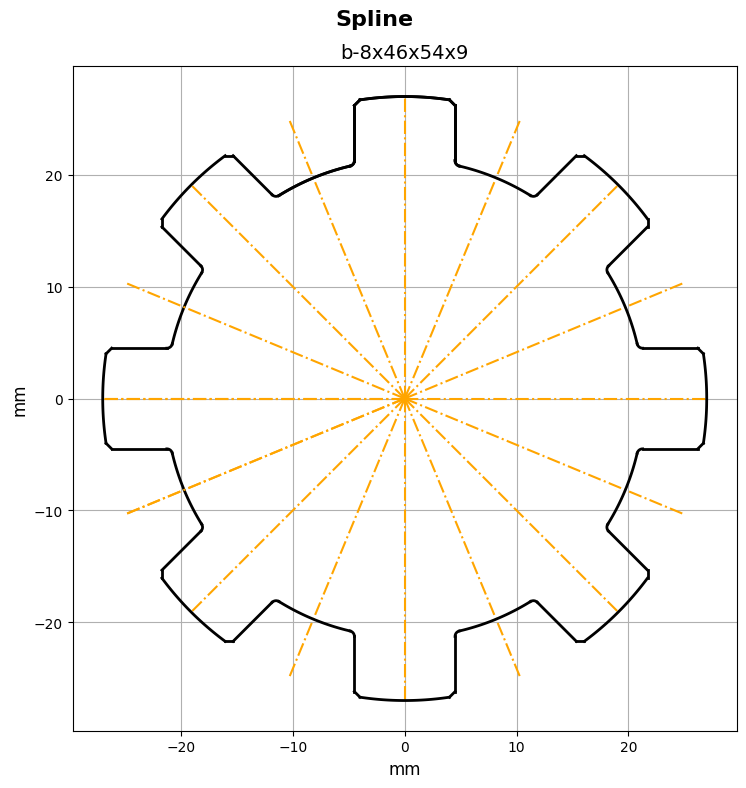

In [95]:
spline1139.show()

In [96]:
moment = 40
length = 30 / 1_000

spline1139.tension(moment, length)

(2494331.0657596374, 3401360.5442176876)

## 6033

In [97]:
STANDARDS['6033']['description']

'шлицевые соединения с эвольвентными зубьями'

In [98]:
with pd.option_context("display.max_rows", 100, "display.max_columns", 20):
    display(STANDARDS['6033']['standard'])

,0.00050,0.00060,0.00080,0.00100,0.00125,0.00150,0.00200,0.00250,0.00300,0.00350,0.00400,0.00500,0.00600,0.00800,0.01000
D,,,,,,,,,,,,,,,
0.004,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.005,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.006,10,8,6,0,0,0,0,0,0,0,0,0,0,0,0
0.007,12,10,7,0,0,0,0,0,0,0,0,0,0,0,0
0.008,14,12,8,6,0,0,0,0,0,0,0,0,0,0,0
0.009,16,13,10,7,0,0,0,0,0,0,0,0,0,0,0
0.010,18,15,11,8,6,0,0,0,0,0,0,0,0,0,0
0.012,22,18,13,10,8,6,0,0,0,0,0,0,0,0,0
0.014,26,22,16,12,10,8,0,0,0,0,0,0,0,0,0


In [99]:
spline6033 = Spline('6033', 'left', n_teeth=32, module=0.003, D=0.1)

In [100]:
spline6033.resistance_moment

np.float64(4.859676389576079e-05)

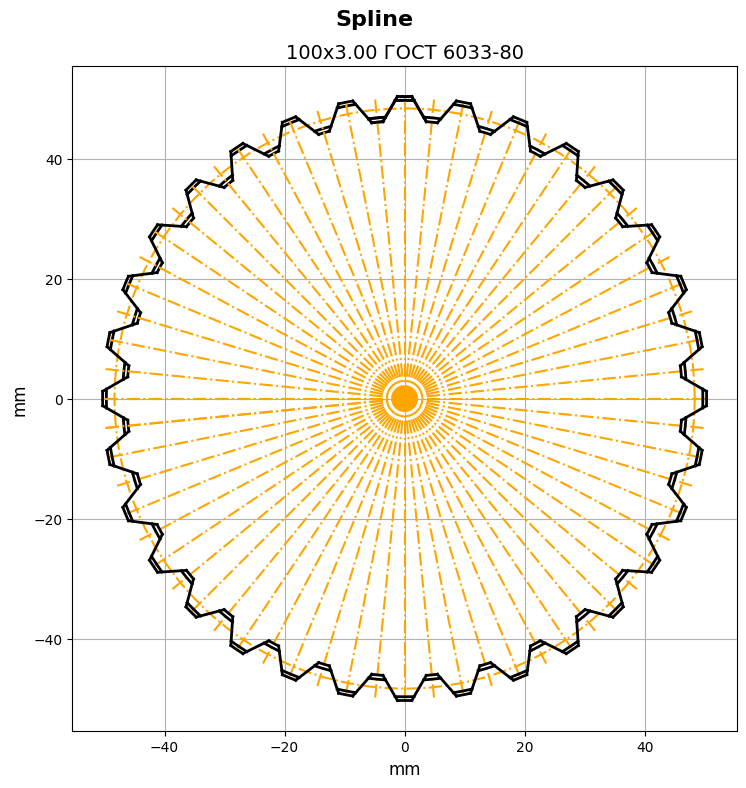

In [101]:
spline6033.show()

In [102]:
moment = 40
length = 30 / 1_000

spline6033.tension(moment, length)

(240577.96162242902, 330345.8577502011)

## 100092

In [103]:
STANDARDS['100092']['description']

'шлицевые соединения треугольного профиля'

In [104]:
with pd.option_context("display.max_rows", 100, "display.max_columns", 20):
    display(STANDARDS['100092']['standard'])

,module,n_teeth,d,gamma,da,da_min,da_max,Da,Da_min,Da_max,df,Df,r,R,circumferential_step,circumferential_step_min,circumferential_step_max,D0,d0
0,0.0003,20,0.0060,54.000000,0.0063,-0.000030,0.0,0.0057,0.0,0.000025,0.0055,0.0065,0.00010,0.00010,0.00047,-0.00012,-0.00006,0.006905,0.005334
1,0.0003,25,0.0075,57.600000,0.0078,-0.000030,0.0,0.0072,0.0,0.000030,0.0070,0.0080,0.00010,0.00010,0.00050,-0.00012,-0.00006,0.008342,0.006837
2,0.0003,30,0.0090,60.000000,0.0093,-0.000030,0.0,0.0087,0.0,0.000030,0.0085,0.0095,0.00010,0.00010,0.00050,-0.00012,-0.00006,0.009804,0.008339
3,0.0003,35,0.0105,61.714444,0.0108,-0.000035,0.0,0.0102,0.0,0.000035,0.0100,0.0110,0.00010,0.00010,0.00050,-0.00012,-0.00006,0.011278,0.009841
4,0.0003,40,0.0120,63.000000,0.0123,-0.000035,0.0,0.0117,0.0,0.000035,0.0115,0.0125,0.00010,0.00010,0.00050,-0.00012,-0.00006,0.012759,0.011342
5,0.0003,45,0.0135,64.000000,0.0138,-0.000035,0.0,0.0132,0.0,0.000035,0.0130,0.0140,0.00010,0.00010,0.00050,-0.00012,-0.00006,0.014246,0.012843
6,0.0003,50,0.0150,64.800000,0.0153,-0.000035,0.0,0.0147,0.0,0.000035,0.0145,0.0155,0.00010,0.00010,0.00050,-0.00012,-0.00006,0.015735,0.014344
7,0.0004,20,0.0080,54.000000,0.0084,-0.000030,0.0,0.0076,0.0,0.000030,0.0074,0.0086,0.00010,0.00010,0.00063,-0.00012,-0.00006,0.009207,0.007111
8,0.0004,25,0.0100,57.600000,0.0104,-0.000035,0.0,0.0096,0.0,0.000030,0.0094,0.0106,0.00010,0.00010,0.00063,-0.00012,-0.00006,0.011122,0.009116
9,0.0004,30,0.0120,60.000000,0.0124,-0.000035,0.0,0.0116,0.0,0.000035,0.0114,0.0126,0.00010,0.00010,0.00063,-0.00012,-0.00006,0.013071,0.011119


In [105]:
spline100092 = Spline('100092', 'left', n_teeth=40, module=0.0006, d=0.0240)

In [106]:
spline100092.resistance_moment

9.733353409441323e-07

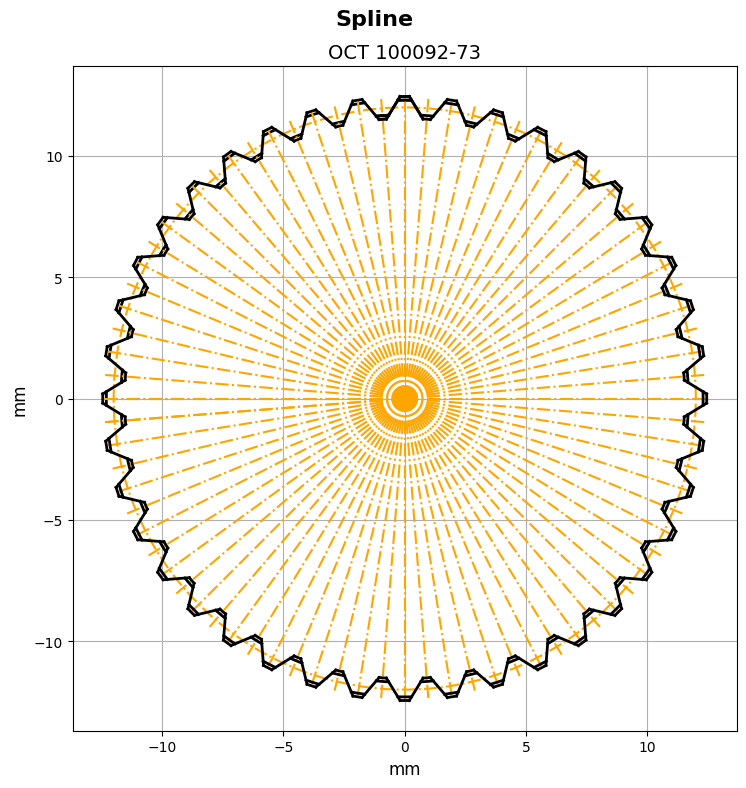

In [107]:
spline100092.show()

In [108]:
moment = 40
length = 30 / 1_000

spline100092.tension(moment, length)

(4074074.0740740714, 5555555.555555552)

# fit

In [110]:
standard = str(np.random.choice(tuple(STANDARDS.keys())))
standard

'6033'

In [111]:
splines_fitted = Spline.fit(standard, 'left', max_tension=40*10**6, moment=40, length=30/1_000)
splines_fitted

({'n_teeth': 16,
  'module': 0.0005,
  'D': 0.009,
  'safety': (1.2107462686567163, 0.8817391304347825)},
 {'n_teeth': 18,
  'module': 0.0005,
  'D': 0.01,
  'safety': (1.5232835820895523, 1.1093478260869565)},
 {'n_teeth': 22,
  'module': 0.0005,
  'D': 0.012,
  'safety': (2.255820895522388, 1.6428260869565217)},
 {'n_teeth': 26,
  'module': 0.0005,
  'D': 0.014,
  'safety': (3.131641791044776, 2.2806521739130434)},
 {'n_teeth': 28,
  'module': 0.0005,
  'D': 0.015,
  'safety': (3.623283582089552, 2.6386956521739124)},
 {'n_teeth': 30,
  'module': 0.0005,
  'D': 0.016,
  'safety': (4.150746268656716, 3.0228260869565218)},
 {'n_teeth': 32,
  'module': 0.0005,
  'D': 0.017,
  'safety': (4.714029850746269, 3.4330434782608696)},
 {'n_teeth': 34,
  'module': 0.0005,
  'D': 0.018,
  'safety': (5.31313432835821, 3.869347826086957)},
 {'n_teeth': 38,
  'module': 0.0005,
  'D': 0.02,
  'safety': (6.618805970149254, 4.820217391304348)},
 {'n_teeth': 42,
  'module': 0.0005,
  'D': 0.022,
  'safe

In [112]:
spline = Spline(standard, 'left', **splines_fitted[0])

In [124]:
spline.resistance_moment

np.float64(1.2077176518879424e-08)

In [123]:
type(spline.da)

float

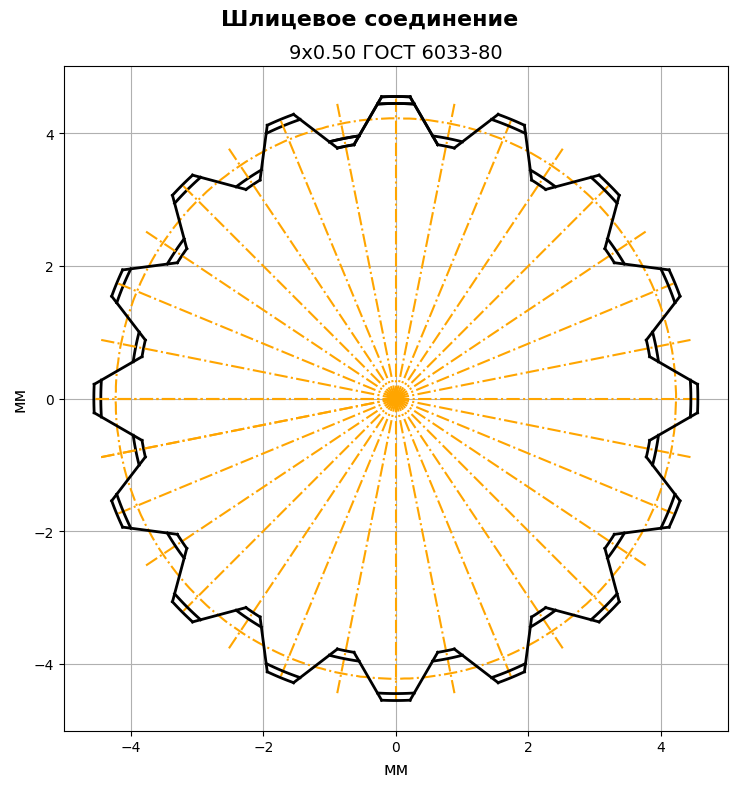

In [114]:
spline.show(suptitle='Шлицевое соединение', xlabel='мм', ylabel='мм')